# Logistic Regression

In [42]:
import numpy as np 
import matplotlib.pyplot as plt 

### 1. tanh
$$
y = tanh(x) = \frac{sinh(x)}{cosh(x)} = \frac{e^{2x} -1}{e^{2x} + 1}
$$

$x \in (-\infty, +\infty)$, $y \in [-1,1]$

in_array :  [-3.14159265 -2.57039399 -1.99919533 -1.42799666 -0.856798   -0.28559933
  0.28559933  0.856798    1.42799666  1.99919533  2.57039399  3.14159265]

out_array :  [-0.99627208 -0.98836197 -0.96397069 -0.89125532 -0.69460424 -0.27807943
  0.27807943  0.69460424  0.89125532  0.96397069  0.98836197  0.99627208]


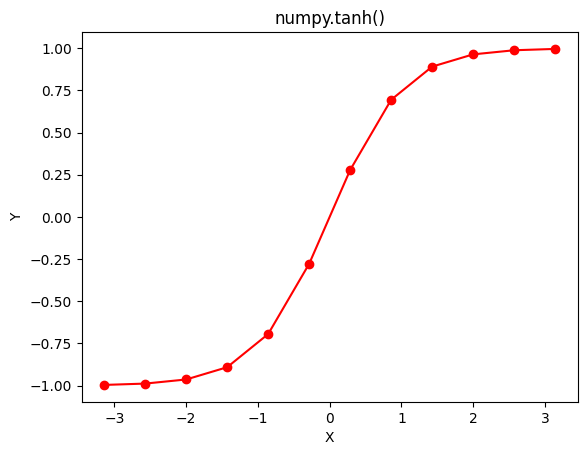

In [43]:
in_array = np.linspace(-np.pi, np.pi, 12) 
out_array = np.tanh(in_array) 
  
print("in_array : ", in_array) 
print("\nout_array : ", out_array) 
  
# red for numpy.tanh() 
plt.plot(in_array, out_array, color = 'red', marker = "o") 
plt.title("numpy.tanh()") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 

### 2. sigmoid

$$
y = \sigma(x) = \frac{1}{1 + e^{-x}}
$$

$x \in (-\infty, +\infty)$, $y \in [0,1]$

In [44]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

in_array :  [-5.         -4.58333333 -4.16666667 -3.75       -3.33333333 -2.91666667
 -2.5        -2.08333333 -1.66666667 -1.25       -0.83333333 -0.41666667
  0.          0.41666667  0.83333333  1.25        1.66666667  2.08333333
  2.5         2.91666667  3.33333333  3.75        4.16666667  4.58333333
  5.        ]

out_array :  [0.00669285 0.01011736 0.01526715 0.02297737 0.0344452  0.05133579
 0.07585818 0.11072732 0.1588691  0.22270014 0.30294072 0.39731466
 0.5        0.60268534 0.69705928 0.77729986 0.8411309  0.88927268
 0.92414182 0.94866421 0.9655548  0.97702263 0.98473285 0.98988264
 0.99330715]


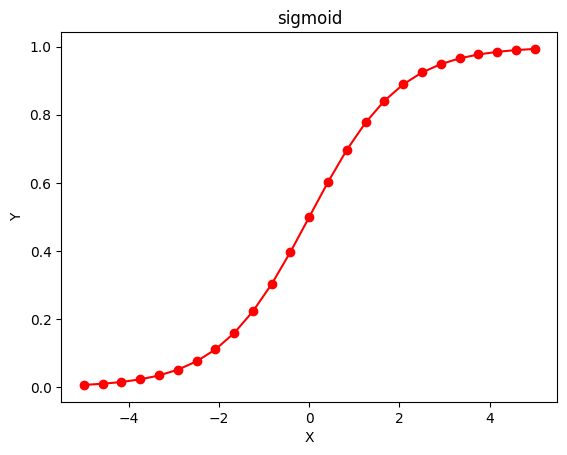

In [45]:
in_array = np.linspace(-5, 5, 25) 
out_array = sigmoid(in_array) 
  
print("in_array : ", in_array) 
print("\nout_array : ", out_array) 
  
# red for numpy.tanh() 
plt.plot(in_array, out_array, color = 'red', marker = "o") 
plt.title("sigmoid") 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.show() 

### 3. Log of odds

in_array :  [1.00000000e-05 2.04179388e-02 4.08258776e-02 6.12338163e-02
 8.16417551e-02 1.02049694e-01 1.22457633e-01 1.42865571e-01
 1.63273510e-01 1.83681449e-01 2.04089388e-01 2.24497327e-01
 2.44905265e-01 2.65313204e-01 2.85721143e-01 3.06129082e-01
 3.26537020e-01 3.46944959e-01 3.67352898e-01 3.87760837e-01
 4.08168776e-01 4.28576714e-01 4.48984653e-01 4.69392592e-01
 4.89800531e-01 5.10208469e-01 5.30616408e-01 5.51024347e-01
 5.71432286e-01 5.91840224e-01 6.12248163e-01 6.32656102e-01
 6.53064041e-01 6.73471980e-01 6.93879918e-01 7.14287857e-01
 7.34695796e-01 7.55103735e-01 7.75511673e-01 7.95919612e-01
 8.16327551e-01 8.36735490e-01 8.57143429e-01 8.77551367e-01
 8.97959306e-01 9.18367245e-01 9.38775184e-01 9.59183122e-01
 9.79591061e-01 9.99999000e-01]

out_array :  [-11.51291546  -3.87071215  -3.15675649  -2.72986685  -2.42024672
  -2.17465484  -1.96936012  -1.79169064  -1.63407047  -1.49160166
  -1.36092881  -1.23964763  -1.12597175  -1.01853325  -0.91625713
  -0.8182791

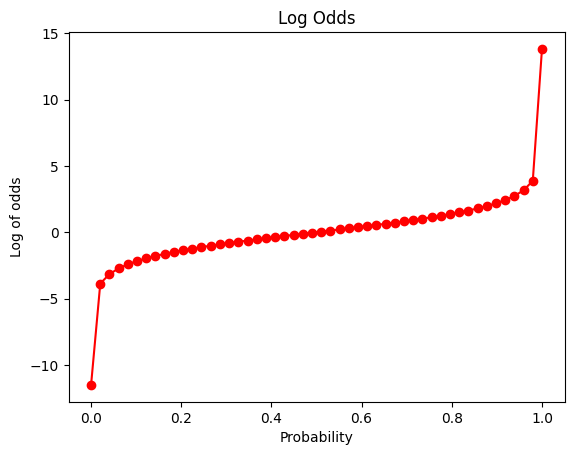

In [46]:
p = np.linspace(0.00001, 0.999999, 50) 
odds_ratio = p/(1-p)
log_odds = np.log(odds_ratio)

print("in_array : ", p) 
print("\nout_array : ", log_odds) 
  
# red for numpy.tanh() 
plt.plot(p, log_odds, color = 'red', marker = "o") 
plt.title("Log Odds") 
plt.xlabel("Probability") 
plt.ylabel("Log of odds") 
plt.show() 

$$
log \biggr(\frac{p}{1-p} \biggr) = w_1x_1 + w_2x_2 + .... w_nx_n + b = w^Tx + b
$$
Simplifying and reordering we get
$$
p = \frac{1}{1+e^{-(w^Tx+b)}} = \sigma(w^Tx+b)
$$

In [47]:
from sklearn.datasets import fetch_openml
titanic = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)

In [48]:
df_titanic = titanic[0]
df_titanic['survived'] = titanic[1] 
df_titanic.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


In [49]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    object  
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(5), object(6)
memory usage: 116.8+ KB


In [50]:
print(f"Unique values for feature cabin {df_titanic['cabin'].nunique()}")
print(f"Unique values for feature body {df_titanic['body'].nunique()}")
print(f"Unique values for feature boat {df_titanic['boat'].nunique()}")

Unique values for feature cabin 186
Unique values for feature body 121
Unique values for feature boat 27


In [51]:
df_titanic.drop(columns=["name", "ticket", "cabin", "body", "home.dest", "boat"], inplace=True)
df_titanic.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1.0,female,29.0000,0.0,0.0,211.3375,S,1
1,1.0,male,0.9167,1.0,2.0,151.5500,S,1
2,1.0,female,2.0000,1.0,2.0,151.5500,S,0
3,1.0,male,30.0000,1.0,2.0,151.5500,S,0
4,1.0,female,25.0000,1.0,2.0,151.5500,S,0


In [52]:
df_titanic.drop(np.where(df_titanic["embarked"].isna())[0], inplace=True)
df_titanic.drop(np.where(df_titanic["fare"].isna())[0], inplace=True)
df_titanic.shape

(1306, 8)

In [53]:
from sklearn.model_selection import train_test_split

X = df_titanic.iloc[:,:-1:]
y = df_titanic.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [54]:
from sklearn.preprocessing import LabelEncoder

lbl_encoder = LabelEncoder()
sex_train_encoded = lbl_encoder.fit_transform(X_train["sex"])
sex_test_encoded = lbl_encoder.transform(X_test["sex"])

lbl_encoder2 = LabelEncoder()
embark_train_encoded = lbl_encoder.fit_transform(X_train["embarked"])
embark_test_encoded = lbl_encoder.transform(X_test["embarked"])

tgt_encoder = LabelEncoder()
y_train_encoded = tgt_encoder.fit_transform(y_train)
y_test_encoded = tgt_encoder.transform(y_test)

In [55]:
X_train_new = np.hstack( 
    (X_train.iloc[:,0:1].to_numpy(), sex_train_encoded.reshape(-1,1), 
     X_train.iloc[:,2:6].to_numpy(), embark_train_encoded.reshape(-1,1)))
X_test_new = np.hstack(
    (X_test.iloc[:,0:1].to_numpy(), sex_test_encoded.reshape(-1,1), 
     X_test.iloc[:,2:6].to_numpy(), embark_test_encoded.reshape(-1,1)))

In [56]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')
X_train_imputed = imputer.fit_transform(X_train_new)
X_train_imputed[0:5]

array([[ 3.    ,  1.    , 32.    ,  0.    ,  0.    , 56.4958,  2.    ],
       [ 2.    ,  1.    , 27.    ,  0.    ,  0.    , 26.    ,  2.    ],
       [ 3.    ,  1.    , 35.    ,  0.    ,  0.    ,  7.8958,  2.    ],
       [ 3.    ,  0.    , 26.    ,  1.    ,  1.    , 22.025 ,  2.    ],
       [ 3.    ,  1.    , 33.    ,  0.    ,  0.    ,  8.6542,  2.    ]])

In [57]:
X_test_imputed = imputer.transform(X_test_new)
X_test_imputed[0:5]

array([[ 3.        ,  0.        , 28.35714286,  8.        ,  2.        ,
        69.55      ,  2.        ],
       [ 2.        ,  1.        , 36.5       ,  0.        ,  2.        ,
        26.        ,  2.        ],
       [ 3.        ,  1.        , 20.        ,  0.        ,  0.        ,
         9.5       ,  2.        ],
       [ 3.        ,  1.        , 27.        ,  0.        ,  0.        ,
         6.975     ,  2.        ],
       [ 3.        ,  0.        , 14.5       ,  1.        ,  0.        ,
        14.4542    ,  0.        ]])

In [58]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_imputed, y_train)

LogisticRegression()

In [59]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_imputed, y_train)

LogisticRegression(max_iter=1000)

In [60]:
train_accuracy = clf.score(X_train_imputed, y_train)
print(f'Train accuracy: {train_accuracy * 100:.3f}%')

test_accuracy = clf.score(X_test_imputed, y_test)
print(f'Test accuracy: {test_accuracy * 100:.3f}%')

Train accuracy: 79.540%
Test accuracy: 79.337%


In [61]:
print(clf.n_iter_)

[119]


In [62]:
print(clf.coef_)
print(clf.intercept_)

[[-1.07526350e+00 -2.53706539e+00 -3.25485167e-02 -2.74221871e-01
  -1.25196253e-01  7.86235307e-05 -2.89200670e-01]]
[5.01582649]


**Solvers**

https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions/52388406#52388406

In [63]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(X_train_imputed, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

  liblinear 0.798
  newton-cg 0.793
  lbfgs 0.793
  sag 0.688
  saga 0.682


**multiclass**

In [64]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine

In [65]:
rd = load_wine()
X, y = load_wine(return_X_y=True)

df = pd.DataFrame(X, columns=rd.feature_names)
df['target'] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:,-1], random_state=34)

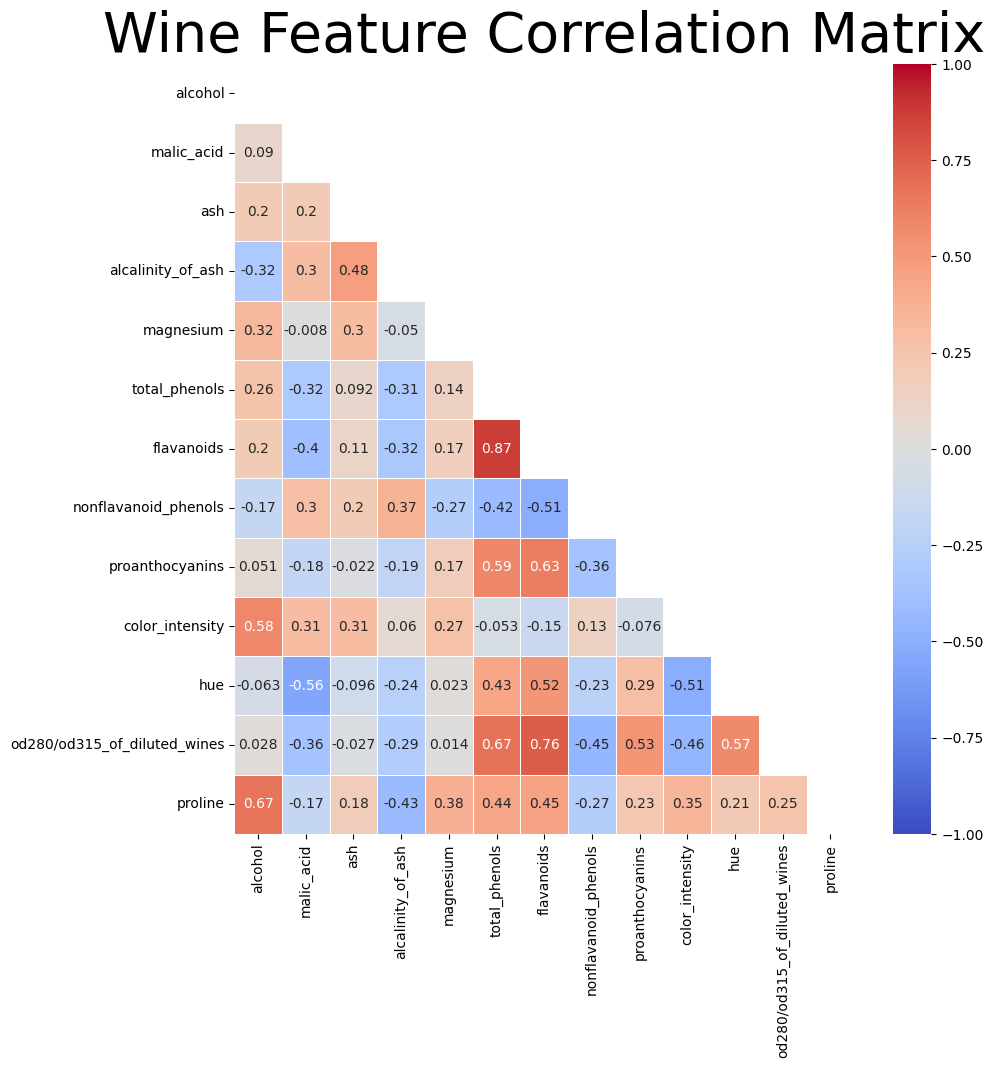

In [67]:

mask = np.zeros_like(X_train.corr(), dtype=bool)
mask[np.triu_indices_from(mask)]= True

plt.figure(figsize=(10,10))
plt.title("Wine Feature Correlation Matrix", fontsize=40)
x = sns.heatmap(
    X_train.corr(), 
    cmap='coolwarm',
    annot=True,
    mask=mask,
    linewidths = .5,
    vmin = -1, 
    vmax = 1,
)

In [68]:
logistic_regression_model = LogisticRegression(random_state=34, solver='lbfgs', multi_class="auto", n_jobs=-1, C=1)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(C=1, n_jobs=-1, random_state=34)

In [69]:
accuracy_score = logistic_regression_model.score(X_test, y_test)
accuracy_score 

0.9333333333333333

In [70]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
parameters = dict(solver=solver_list)
lr = LogisticRegression(random_state=34, multi_class="auto", n_jobs=-1, C=1)
clf = GridSearchCV(lr, parameters, cv=5)

In [71]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, n_jobs=-1, random_state=34),
             param_grid={'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [72]:
clf.cv_results_['mean_test_score']

array([0.96239316, 0.94757835, 0.96239316, 0.6997151 , 0.66153846])

In [73]:
scores = clf.cv_results_['mean_test_score']
for score, solver, in zip(scores, solver_list):
    print(f"{solver}: {score:.3f}")

liblinear: 0.962
newton-cg: 0.948
lbfgs: 0.962
sag: 0.700
saga: 0.662


Text(0.5, 1.0, 'Wine Accuracy with Unscaled Features')

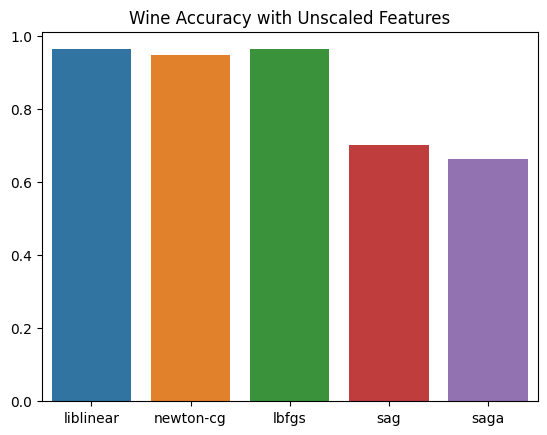

In [74]:
sns.barplot(x=solver_list, y=scores). set_title("Wine Accuracy with Unscaled Features")

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
parameters = dict(solver=solver_list)
lr = LogisticRegression(random_state=34, multi_class="auto", n_jobs=-1, C=1)
clf = GridSearchCV(lr, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, n_jobs=-1, random_state=34),
             param_grid={'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']})

In [77]:
clf.cv_results_['mean_test_score']
scores = clf.cv_results_['mean_test_score']
for score, solver, in zip(scores, solver_list):
    print(f"{solver}: {score:.3f}")

liblinear: 0.955
newton-cg: 0.970
lbfgs: 0.970
sag: 0.970
saga: 0.970


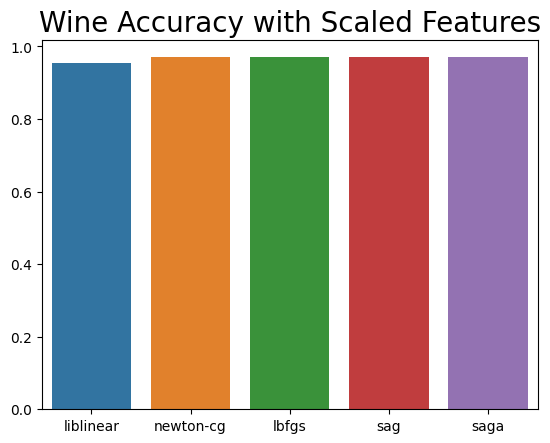

In [78]:
ax =sns.barplot(x=solver_list, y=scores).set_title("Wine Accuracy with Scaled Features", fontsize="20")

**One versus Rest and One Versus One**

https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/

When to use which
1. When data is imbalanced, prefer OVO

SVM too has similar OVO and OVR support in sklearn